In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import  Image
from scipy import ndimage


D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_dataset():
    train_dataset = h5py.File('F:/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('F:/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [4]:
print(train_set_y.shape)

(1, 209)


y = [0], it's a 'non-cat' picture.


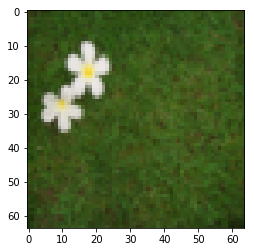

In [5]:
index = 6
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten  = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [10]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

In [11]:
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

In [13]:
print(sigmoid(np.array([9,12])))

[0.99987661 0.99999386]


In [12]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert (w.shape ==(dim,1))
    assert (isinstance(b,float) or isinstance(b,int))
    return w,b

In [28]:
dim = 2
w,b = initialize_with_zeros(dim)
print(w)
print(b)

[[0.]
 [0.]]
0


In [21]:
def propagate(w,b,X,Y):
    m = X.shape[1]#训练样本数量
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1 / m * np.sum(Y*np.log(A) + (1 - Y) * np.log(1 - A))
    dw = 1 /m * np.dot(X ,(A - Y).T)
    db = 1 / m * np.sum(A - Y)
    
    assert (dw.shape == w.shape)
#     assert (db.type == np.float)
#     print(cost.shape)
    cost = np.squeeze(cost)
#     print(cost.shape)
    assert (cost.shape == ())
    grads = {
        'dw':dw,
        'db':db
    }
    return grads,cost
    

In [22]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [23]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
    costs = []
    
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 ==0:
            print("Cost after iteration{}:{}".format(i,cost))
    params = {
        'w':w,
        'b':b
    }
    grads = {'dw':dw,
            'db':db}
    return params,grads,costs



In [24]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print(costs)

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828
[6.000064773192205]


In [28]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        if A[0,i] < 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert( Y_prediction.shape == (1,m))
    return Y_prediction


In [49]:
print(predict(w,b,X))

[[1. 1.]]


In [26]:
def model(X_train,Y_train,X_test,Y_test,num_iteration=2000,learning_rate=0.5,print_cost=False):
    w,b = initialize_with_zeros(X_train.shape[0])
    parameters,grads,costs = optimize(w,b,X_train,Y_train,num_iteration,learning_rate,print_cost)
    w = parameters['w']
    b = parameters['b']
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {"costs":costs,
        "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iteration}
    
    return d

In [31]:
d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iteration=2000,learning_rate
          =0.005,print_cost=True)


Cost after iteration0:0.6931471805599453
Cost after iteration100:0.5845083636993086
Cost after iteration200:0.46694904094655476
Cost after iteration300:0.37600686694802077
Cost after iteration400:0.3314632893282513
Cost after iteration500:0.30327306747438293
Cost after iteration600:0.2798795865826048
Cost after iteration700:0.26004213692587574
Cost after iteration800:0.24294068467796623
Cost after iteration900:0.22800422256726066
Cost after iteration1000:0.21481951378449635
Cost after iteration1100:0.20307819060644985
Cost after iteration1200:0.1925442771670686
Cost after iteration1300:0.18303333796883503
Cost after iteration1400:0.17439859438448876
Cost after iteration1500:0.16652139705400335
Cost after iteration1600:0.15930451829756614
Cost after iteration1700:0.15266732471296504
Cost after iteration1800:0.1465422350398234
Cost after iteration1900:0.14087207570310162
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


64
y = 1, you predicted that it is a "cat" picture.


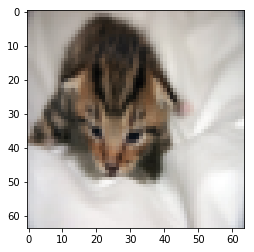

In [60]:
index = 1
print(num_px)
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

In [32]:
costs = np.squeeze(d['costs'])
print(costs.shape)

(20,)


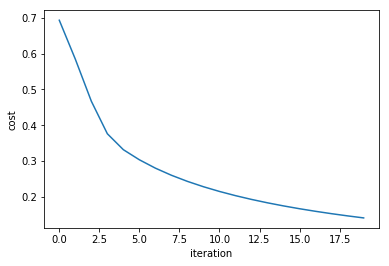

In [33]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

In [34]:
print(costs)

[0.69314718 0.58450836 0.46694904 0.37600687 0.33146329 0.30327307
 0.27987959 0.26004214 0.24294068 0.22800422 0.21481951 0.20307819
 0.19254428 0.18303334 0.17439859 0.1665214  0.15930452 0.15266732
 0.14654224 0.14087208]


learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
+---------------------------------------------+
learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %
+---------------------------------------------+
learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %
+---------------------------------------------+


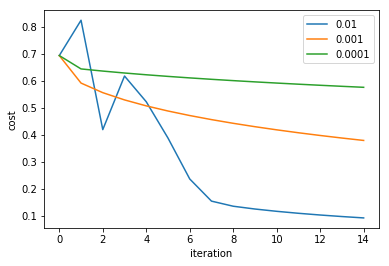

In [39]:
#测试不同的学习率
learning_rate = [0.01,0.001,0.0001]
models = {}
for i in learning_rate:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iteration = 1500, learning_rate = i, print_cost = False)
    print('+---------------------------------------------+')
    
for i in models:
    plt.plot(models[i]['costs'],label=str(i))

plt.legend(loc='best')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(12288, 1)
[[1.]]
y = 1.0, your algorithm predicts a "cat" picture.


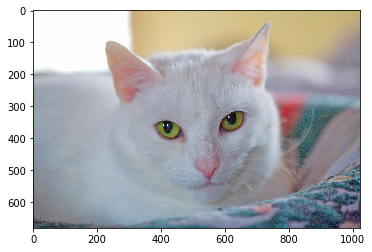

In [49]:
cat1 = 'F:/cat1.jpg'
image = np.array(ndimage.imread(cat1))
my_image = scipy.misc.imresize(image,size=(num_px,num_px))
my_image = np.array(my_image)        
my_image = my_image.reshape((1,num_px*num_px*3)).T
print(my_image.shape)
my_predicted_image = predict(d['w'],d['b'],my_image)
plt.imshow(image)
print(my_predicted_image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")